In [1]:
import pandas as pd
import numpy as np

In [2]:
target_col = 'price_range'

In [3]:
data = pd.read_csv('./phone.csv')

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.shape

(2000, 21)

In [8]:
data.price_range.unique()

array([1, 2, 3, 0])

In [9]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != target_col]
data_y = data[target_col]

In [10]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state = 1)

In [11]:
train_x.shape

(1600, 20)

In [12]:
test_x.shape

(400, 20)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest_100 = RandomForestClassifier(n_estimators=100)
random_forest_100.fit(train_x, train_y)

RandomForestClassifier()

In [15]:
test_model(random_forest_100)

mean_absolute_error: 0.13
median_absolute_error: 0.0
r2_score: 0.89


In [16]:
param_range = np.arange(50,200,5)
tuned_parameters = [{'n_estimators' : param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
         115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
         180, 185, 190, 195])}]

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestClassifier(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195])}],
             return_train_score=True, scoring='r2')

In [19]:
reg = gs.best_estimator_

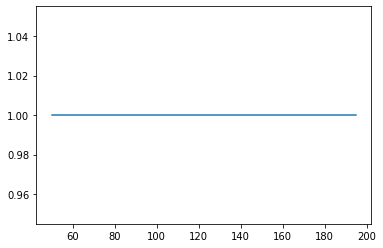

In [20]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

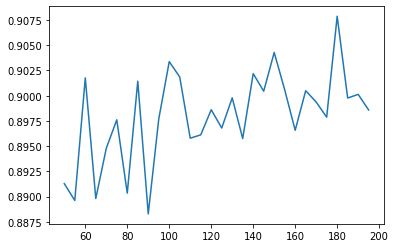

In [21]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [22]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 0.12
median_absolute_error: 0.0
r2_score: 0.9


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gr_boost_100 = GradientBoostingClassifier(n_estimators=100)
gr_boost_100.fit(train_x, train_y)

GradientBoostingClassifier()

In [24]:
test_model(gr_boost_100)

mean_absolute_error: 0.12
median_absolute_error: 0.0
r2_score: 0.9


In [25]:
gs = GridSearchCV(GradientBoostingClassifier(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195])}],
             return_train_score=True, scoring='r2')

In [26]:
reg = gs.best_estimator_

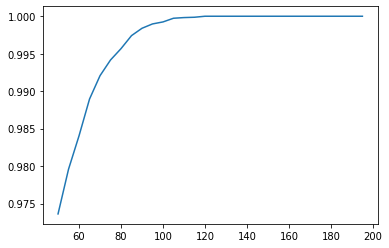

In [27]:
plt.plot(param_range, gs.cv_results_["mean_train_score"])

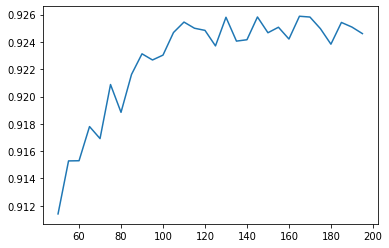

In [28]:
plt.plot(param_range, gs.cv_results_["mean_test_score"])

In [29]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.92
